# **Data Visualization**


## Connecting to Database:


Downloading Database:


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-11-09 11:07:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  25.1MB/s    in 1.4s    

2023-11-09 11:07:10 (25.1 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connecting to database:


In [5]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Importing Pandas:


In [6]:
import pandas as pd

## Visualizing Distribution


### Histograms


Histogram of **ConvertedComp**:


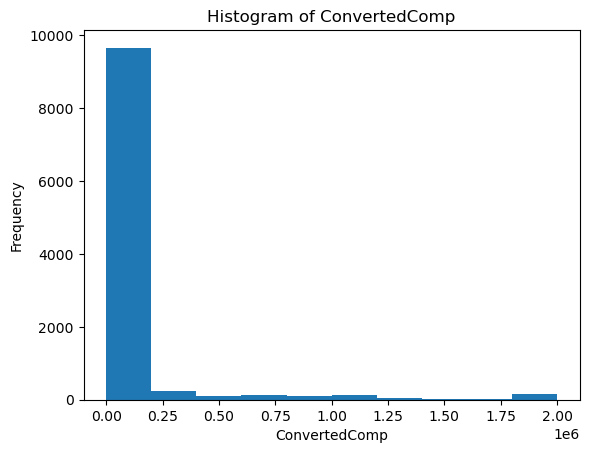

In [9]:
import matplotlib.pyplot as plt

df = pd.read_sql_query("SELECT * FROM master", conn)

plt.hist(df['ConvertedComp'])
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')

plt.show()

### Box Plots


BoxPlot of **Age**:


<AxesSubplot:>

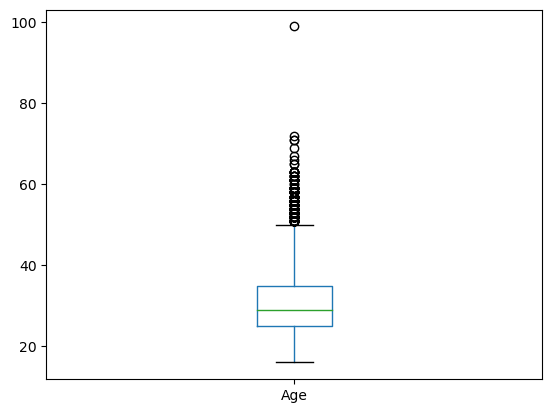

In [12]:
df = pd.read_sql_query("SELECT * FROM master" ,conn)  

df.boxplot(column =['Age'],grid=False)   

## Visualizing relationships in data


### Scatter Plots


Scatter Plot of **Age** and **WorkWeekHrs**


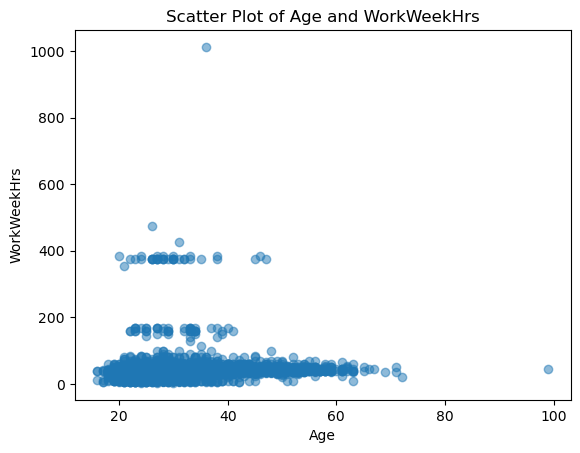

In [13]:
df = pd.read_sql_query("SELECT * FROM master", conn)

plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)

plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age and WorkWeekHrs')

plt.show()

### Bubble Plots


Bubble Plot of **WorkWeekHrs** and **CodeRevHrs**, using **Age** column as bubble size:


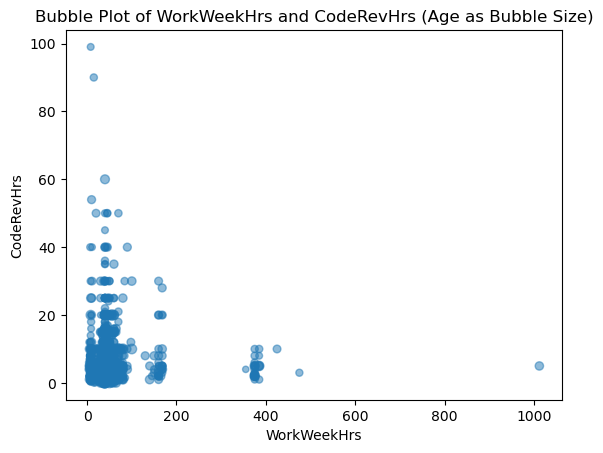

In [14]:
df = pd.read_sql_query("SELECT * FROM master", conn)

plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'], alpha=0.5)

plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs (Age as Bubble Size)')

plt.show()

## Visualizing composition of data


### Pie Charts


Pie Chart of Top 5 **DatabasesDesireNextYear**:


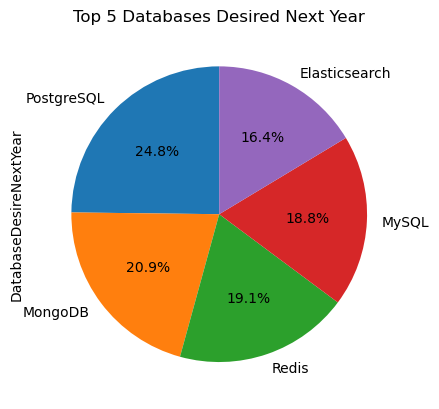

In [19]:
df = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear", conn)

top_databases = df['DatabaseDesireNextYear'].value_counts().head(5)
top_databases.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Desired Next Year')
plt.show()

### Stacked Charts


Stacked chart of median **WorkWeekHrs** and **CodeRevHrs** for the age group 30 to 35.


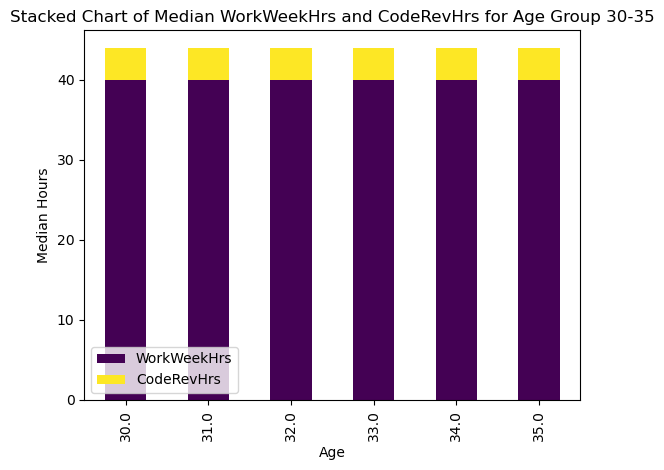

In [20]:
df = pd.read_sql_query("SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE Age BETWEEN 30 and 35", conn)

median_values = df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

median_values.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

plt.show()

## Visualizing comparison of data


### Line Chart


Line Chart of median **ConvertedComp** for Ages 45-60:


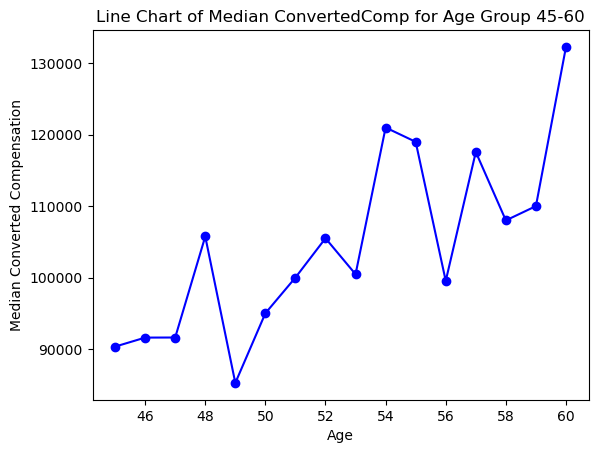

In [21]:
df = pd.read_sql_query("SELECT ConvertedComp, Age FROM master WHERE Age BETWEEN 45 and 60", conn)

median_values = df.groupby('Age')['ConvertedComp'].median()

median_values.plot(kind='line', marker='o', color='blue')

plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.title('Line Chart of Median ConvertedComp for Age Group 45-60')

plt.show()

### Bar Chart


Horizontal Bar Chart using **MainBranch**


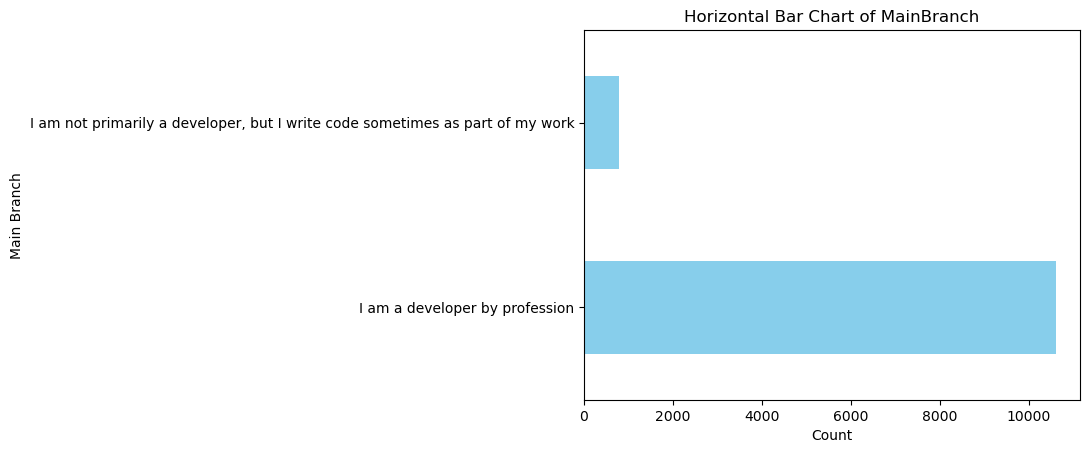

In [23]:
df = pd.read_sql_query("SELECT * FROM master", conn)

branch_counts = df['MainBranch'].value_counts()

branch_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Horizontal Bar Chart of MainBranch')

plt.show()

Closing Database Connection:


In [24]:
conn.close()